In [79]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [59]:
data = pd.read_csv('titanic_light.csv')
data

,pclass,name,sex,age,embarked,body,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,S,NaN,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,S,NaN,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,S,NaN,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,S,135.0,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,S,NaN,0
...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,C,328.0,0
1305,3,"Zabour, Miss. Thamine",female,NaN,C,NaN,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,C,304.0,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,C,NaN,0


Target: est-ce que les gens ont survécu ou non? Prédire si, en fonction du lieu d'embarquement, on a plus de chance de survivre?

Question à se poser: quels sont les facteurs discriminants : - age, lieu d'embarquement? Type de classe? sexe?

In [60]:
"Si je veux faire une EDA, je dois le faire avant de traiter les données! Je le fais avec les données brutes."

'Si je veux faire une EDA, je dois le faire avant de traiter les données! Je le fais avec les données brutes.'

In [61]:
display(data.duplicated().sum())
data.isna().sum()

np.int64(0)

pclass         0
name           0
sex            0
age          263
embarked       2
body        1188
survived       0
dtype: int64

,pclass,age,body,survived
count,1309.000000,1046.000000,121.000000,1309.000000
mean,2.294882,29.881135,160.809917,0.381971
std,0.837836,14.413500,97.696922,0.486055
min,1.000000,0.166700,1.000000,0.000000
25%,2.000000,21.000000,72.000000,0.000000
50%,3.000000,28.000000,155.000000,0.000000
75%,3.000000,39.000000,256.000000,1.000000
max,3.000000,80.000000,328.000000,1.000000


<Axes: >

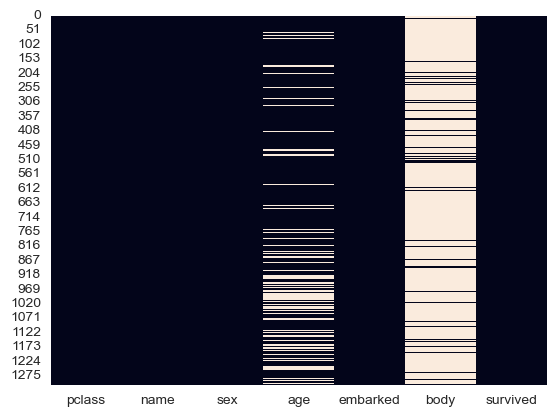

In [62]:
display(data.describe())
sns.heatmap(data.isna(), cbar =False)


In [63]:
# Il va falloir traiter les données pour body et age
data['body'] = data['body'].fillna(0)

# Ici j'ai remplacé par la moyenne de tous les passagers. Est-ce que je remplacerais plutôt par la moyenne des survivants et des disparus? en fonction?
data['age'] = data['age'].fillna(data['age'].mean())

# Vérifier s'il y a encore des
display(data.isna().sum())

# Ici il reste 2 passagers qui n'ont pas de donnée d'embarquement. 2 solutions: soit je supprime, soit j'impute en donnant la valeur la plus élevée

# imputation: data['embarked'].fillna(data['embarqued'].mode())
data = data.dropna(subset=['embarked']) # suppression


pclass      0
name        0
sex         0
age         0
embarked    2
body        0
survived    0
dtype: int64

In [64]:
# Ensuite traiter les données catégorielles
data = pd.get_dummies(data=data, columns=['sex','embarked'], drop_first=True)

# Ou alors utiliser OneHotEncoder afin d'avoir le même résultat

# On sait que le nom n'est pas discriminant donc on peut supprimer la colonne
data.drop(columns=['name'], inplace=True)
" Correction: supprimer la colonne body aussi car c'est post event (ils ont d'office pas survécu donc ne nous intéresse pas)"


In [65]:
data

,pclass,age,body,survived,sex_male,embarked_Q,embarked_S
0,1,29.000000,0.0,1,False,False,True
1,1,0.916700,0.0,1,True,False,True
2,1,2.000000,0.0,0,False,False,True
3,1,30.000000,135.0,0,True,False,True
4,1,25.000000,0.0,0,False,False,True
...,...,...,...,...,...,...,...
1304,3,14.500000,328.0,0,False,False,False
1305,3,29.881135,0.0,0,False,False,False
1306,3,26.500000,304.0,0,True,False,False
1307,3,27.000000,0.0,0,True,False,False


In [89]:
# Instanciation
X = data.drop(columns=['survived'])
y = data['survived']

# Split des données

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [70]:
# Fit
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
model

DecisionTreeClassifier()

In [83]:
# Attribut d'importance des features
model.feature_importances_

array([0.17295766, 0.31388731, 0.03275823, 0.42004436, 0.01354926,
       0.04680318])

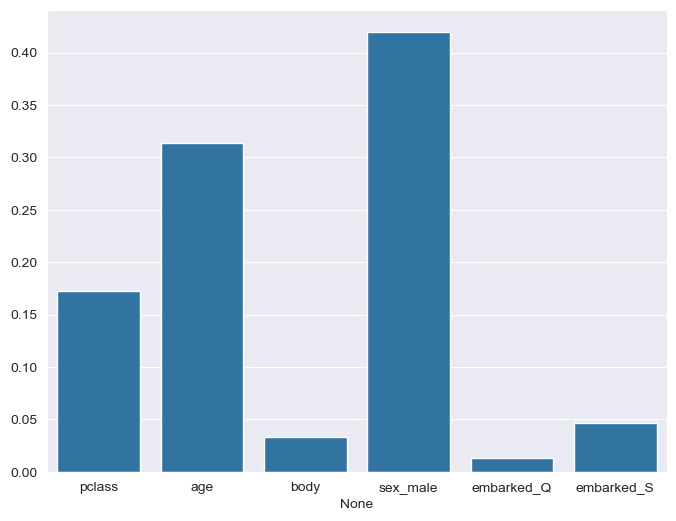

In [86]:
plt.figure(figsize=(8,6))
sns.barplot(x=X.columns, y=model.feature_importances_)
plt.show()

In [88]:
# Predict
y_pred = model.predict(X)
y_pred

array([1, 1, 0, ..., 0, 0, 0])

In [90]:
# Analyse
accuracy_score(y_test,y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [262, 1307]